In [51]:
#Import Library
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt


### Cek Data

In [52]:
#display data abusive
abusive = pd.read_csv("abusive.csv")
print("Shape: ", abusive.shape)
abusive.head()

Shape:  (125, 1)


,ABUSIVE
0,alay
1,ampas
2,buta
3,keparat
4,anjing


In [53]:
#display data kamus alay
kamusalay = pd.read_csv('new_kamusalay.csv', encoding='ISO-8859-1', header=None)
kamusalay = kamusalay.rename(columns={0: 'original', 
                                      1: 'replacement'})
print("Shape: ", kamusalay.shape, type(kamusalay))
kamusalay.head()

Shape:  (15167, 2) <class 'pandas.core.frame.DataFrame'>


,original,replacement
0,anakjakartaasikasik,anak jakarta asyik asyik
1,pakcikdahtua,pak cik sudah tua
2,pakcikmudalagi,pak cik muda lagi
3,t3tapjokowi,tetap jokowi
4,3x,tiga kali


In [54]:
#Display data.csv atau data_tweet

data = pd.read_csv('data.csv', encoding='ISO-8859-1')

In [57]:
#Head data.csv atau data_tweet

data.head(2)

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0


### Info data tweet

In [58]:
#info data.csv atau data_tweet

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13169 entries, 0 to 13168
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet          13169 non-null  object
 1   HS             13169 non-null  int64 
 2   Abusive        13169 non-null  int64 
 3   HS_Individual  13169 non-null  int64 
 4   HS_Group       13169 non-null  int64 
 5   HS_Religion    13169 non-null  int64 
 6   HS_Race        13169 non-null  int64 
 7   HS_Physical    13169 non-null  int64 
 8   HS_Gender      13169 non-null  int64 
 9   HS_Other       13169 non-null  int64 
 10  HS_Weak        13169 non-null  int64 
 11  HS_Moderate    13169 non-null  int64 
 12  HS_Strong      13169 non-null  int64 
dtypes: int64(12), object(1)
memory usage: 1.3+ MB


In [59]:
data.shape

(13169, 13)

In [60]:
#Cek Missing Value data.csv atau data_tweet

data.isnull().sum()

Tweet            0
HS               0
Abusive          0
HS_Individual    0
HS_Group         0
HS_Religion      0
HS_Race          0
HS_Physical      0
HS_Gender        0
HS_Other         0
HS_Weak          0
HS_Moderate      0
HS_Strong        0
dtype: int64

In [61]:
# Cek Duplikat Data

data.duplicated().sum()

125

In [62]:
# Remove duplicated data.csv atau data.tweet

data = data.drop_duplicates()

In [63]:
# Cek Sanitasi data csv atau data.tweet

data.duplicated().sum()

0

### Tweet berisi Hate Speech and Abusive Words

In [64]:
# Add kolom baru dengan tipe tweet baru

def tweet(x):
    if x['HS'] == 1 and x['Abusive'] == 1:
        return 'Hate Speech & Abusive'
    elif x['HS'] == 1 and x['Abusive'] == 0:
        return 'Hate Speech'
    elif x['HS'] == 0 and x['Abusive'] == 1:
        return 'Abusive'
    else:
        return 'None'

data['Type'] = data.apply(tweet, axis=1)

In [65]:
# Dataset data_tweet
data.head(3)

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,Type
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,Hate Speech & Abusive
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0,Abusive
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0,None


In [66]:
# Klasifikasi data_tweet

data['Type'].value_counts()

Type
None                     5783
Hate Speech & Abusive    3262
Hate Speech              2256
Abusive                  1743
Name: count, dtype: int64

In [49]:
plt.figure(figsize=(8,6))

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

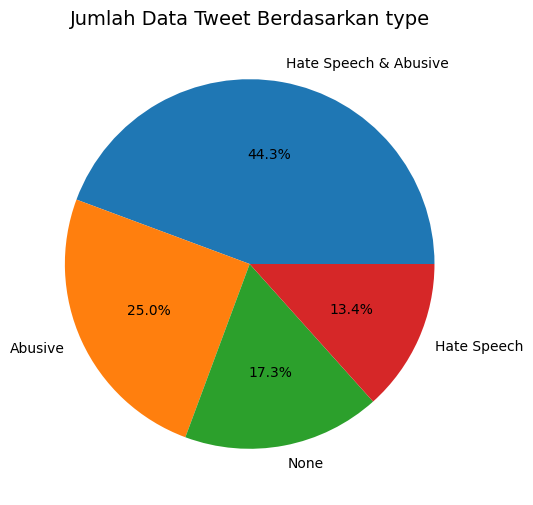

In [67]:
#Visualisasi dengan matplotlib

plt.figure(figsize=(8,6))
plt.title('Jumlah Data Tweet Berdasarkan type', fontsize=14)
plt.pie(data['Type'].value_counts(), labels=data['Type'].unique(), autopct='%1.1f%%')
plt.show()

### Target Hate Speech Tweet

In [68]:
# Add Kolom baru untuk negative tweet target

def target(x):
    if x['HS_Individual'] == 1 and x['HS_Group'] == 1:
        return 'Both'
    elif x['HS_Individual'] == 1 and x['HS_Group'] == 0:
        return 'Individual'
    elif x['HS_Individual'] == 0 and x['HS_Group'] == 1:
        return 'Group'
    else:
        return 'None'

data['Target'] = data.apply(target, axis=1)

In [70]:
#Head Data set

data.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,Type,Target
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,Hate Speech & Abusive,Individual
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0,Abusive,None
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0,None,None
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0,None,None
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0,Hate Speech & Abusive,Group


In [71]:
# Klasifikasi Tweet target 

filter = data['Target'] == 'None'
data[~filter]['Target'].value_counts()


Target
Individual    3540
Group         1978
Name: count, dtype: int64

<Axes: ylabel='count'>

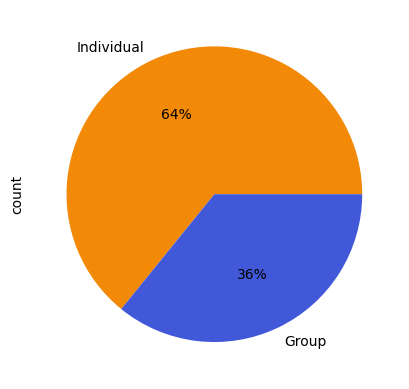

In [72]:
data[~filter]['Target'].value_counts().plot.pie(autopct='%1.0f%%', colors = ['#F28907','#4158D9'])

### Topik dan Level Negative Tweets yang paling banyak dibahas

In [73]:
# Membuat Data Frame baru untuk Hate Speech Tweet Level

df_level = data[(data['HS_Weak'] == 1) | (data['HS_Moderate']==1) | (data['HS_Strong']==1)].reset_index()

In [74]:
#Membuat Kolom baru negative tweet level

def level(x):
    if x['HS_Weak'] == 1:
        return 'Weak'
    elif x['HS_Moderate'] == 1:
        return 'Moderate'
    elif x['HS_Strong'] == 1:
        return 'Strong'
    else:
        return 'None'
    
df_level['Level'] = df_level.apply(level, axis = 1)

In [75]:
# Select interesting column

df_level = pd.DataFrame(df_level, columns=['index', 'Level'])

# Take a look at dataframe

df_level.head()

,index,Level
0,0,Weak
1,4,Moderate
2,5,Moderate
3,10,Weak
4,11,Weak


In [76]:
#Membuat Data Frame Baru Untuk Topik Hate Speech Tweet

df_topic = data[data['Target'] != 'None'].reset_index()

In [77]:
#Membuat kolom baru topik negative tweet

def HStopic(x):
    if x['HS_Religion'] == 1:
        return 'Religion'
    elif x['HS_Race'] == 1:
        return 'Race'
    elif x['HS_Physical'] == 1:
        return 'Physical'
    elif x['HS_Gender'] == 1:
        return 'Gender' 
    else:
        return 'Other'
    
df_topic['Topic'] = df_topic.apply(HStopic, axis = 1)

In [28]:
# Select Interesting Column

df_topic = pd.DataFrame(df_topic, columns=['index', 'Topic'])

In [29]:
# Info Data Frame

df_topic.head()

,index,Topic
0,0,Other
1,4,Religion
2,5,Other
3,10,Other
4,11,Gender


In [78]:
# join df_level and df_topic

df = pd.merge(df_topic, df_level, on='index').drop(['index'], axis=1)
df.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,Type,Target,Topic,Level
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,Hate Speech & Abusive,Individual,Other,Weak
1,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0,Hate Speech & Abusive,Group,Religion,Moderate
2,USER Ya bani taplak dkk \xf0\x9f\x98\x84\xf0\x...,1,1,0,1,0,0,0,0,1,0,1,0,Hate Speech & Abusive,Group,Other,Moderate
3,"Setidaknya gw punya jari tengah buat lu, sebel...",1,1,1,0,0,0,0,0,1,1,0,0,Hate Speech & Abusive,Individual,Other,Weak
4,USER USER USER USER BANCI KALENG MALU GA BISA ...,1,1,1,0,0,0,0,1,0,1,0,0,Hate Speech & Abusive,Individual,Gender,Weak


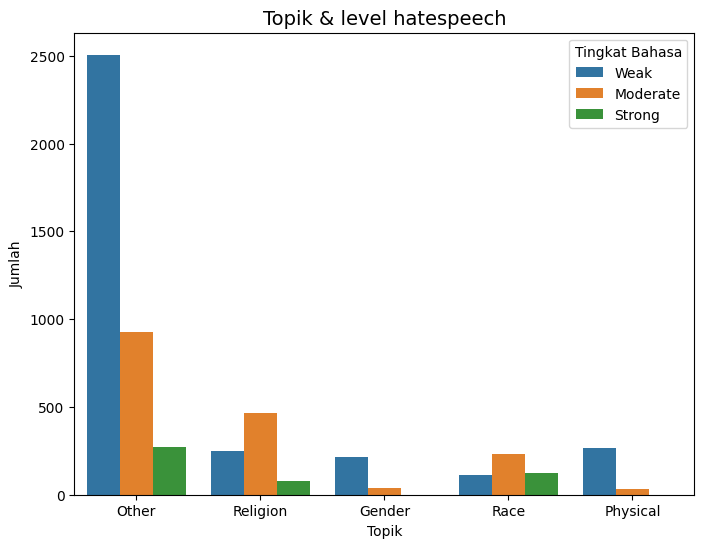

In [31]:
# Visualisasi

plt.figure(figsize=(8,6))
plt.title('Topik & level hatespeech', fontsize=14)
sns.countplot(x='Topic', hue='Level', data=df)
plt.xlabel('Topik')
plt.ylabel('Jumlah')
plt.legend(title='Tingkat Bahasa', loc='upper right')
plt.show()

In [79]:
# Tweet dengan HS_Weak dlm HS_Other example

print('Weak Hate Speech in Other topic example: {}'.format(data[(data['HS_Weak'] == 1) & (data['HS_Other']==1)]['Tweet'][0]))

Weak Hate Speech in Other topic example: - disaat semua cowok berusaha melacak perhatian gue. loe lantas remehkan perhatian yg gue kasih khusus ke elo. basic elo cowok bego ! ! !'


In [80]:
# Tweet dengan HS_Moderate dlm HS_Other example

print('Moderate Hate Speech in Other topic example: {}'.format(data[(data['HS_Moderate'] == 1) & 
                                                                    (data['HS_Other']==1)]['Tweet'][35]))

Moderate Hate Speech in Other topic example: Pegawai Guardian training lagi kek Mentang2 gue kek gembel cuman kaos sama Flat shoes nanya dijutekin bangsad emang males belinya juga kabur gua ke matahari'


In [81]:
# Tweet dengan HS_Strong in HS_Other example

print('Strong Hate Speech in Other topic example: {}'.format(data[(data['HS_Strong'] == 1) & 
                                                                  (data['HS_Other']==1)]['Tweet'][6590]))

Strong Hate Speech in Other topic example: Yup... Negara ini sangat tak pantas dipimpin seorang yg tak faham mengelola Negara dgn benar lengserkan jokowi
